In [17]:
import tomopy 
import matplotlib.pyplot as plt
import numpy as np
import dxchange as dx

rec = dict()

In [27]:
obj = tomopy.baboon(size=128)
print(obj.shape)

(1, 128, 128)


In [28]:
ang = tomopy.angles(nang=120, ang1=0, ang2=180)


In [20]:
prj = tomopy.project(obj, ang, pad=True)

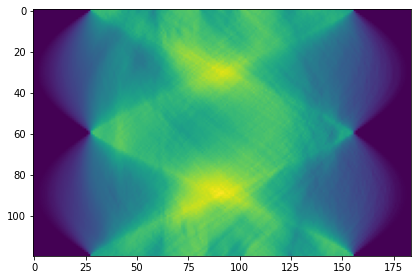

In [21]:
plt.figure(tight_layout=True)
plt.imshow(prj[:, 0, :])
plt.show()

In [22]:
prj_poisson = tomopy.add_poisson(prj / 100)*100

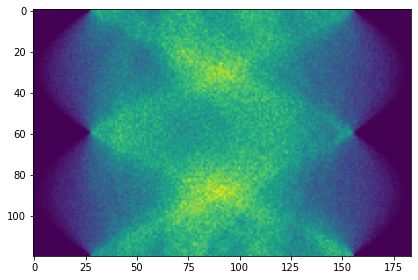

In [23]:
plt.figure(tight_layout=True)
plt.imshow(prj_poisson[:, 0, :])
plt.show()

In [24]:
def add_rings(tomo, std=0.05):
    new_tomo = np.copy(tomo)
    sensitivity = np.random.normal(loc=1, scale=std, size=(1, new_tomo.shape[1], new_tomo.shape[2]))
    new_tomo = new_tomo * sensitivity
    return new_tomo


In [25]:
prj_screwed_up = add_rings(prj_poisson)

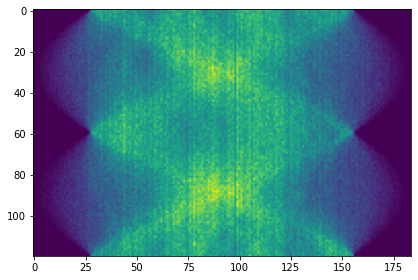

In [26]:
plt.figure(tight_layout=True)
plt.imshow(prj_screwed_up[:, 0, :])
plt.show()

In [91]:
rec['art1'] = tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = 'art', num_gridy=128, num_iter=10)
rec['art2'] = tomopy.recon(prj, ang, num_gridx=128, algorithm = 'art', num_gridy=128, num_iter=10)

rec['mlem1'] = tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = 'mlem', num_gridy=128, num_iter=10)
rec['mlem2'] = tomopy.recon(prj, ang, num_gridx=128, algorithm = 'mlem', num_gridy=128, num_iter=10)

rec['ospml_hybrid1'] = tomopy.recon(prj_screwed_up, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=20, reg_par = [.1, .1], num_block=10)
rec['ospml_hybrid2'] = tomopy.recon(prj, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=20, reg_par = [.1, .1], num_block=10)

Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


Text(0.5, 1.0, 'OSMPL_HYBRID without')

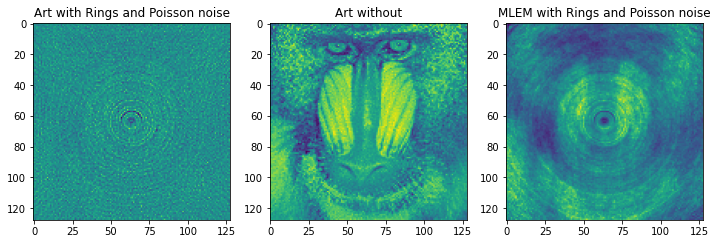

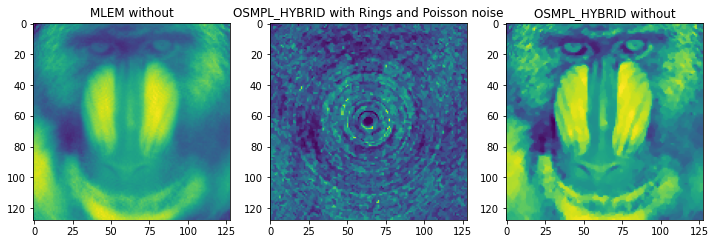

In [93]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(rec['art1'][0])
plt.title('Art with Rings and Poisson noise')
plt.subplot(132)
plt.imshow(rec['art2'][0])
plt.title('Art without')
plt.subplot(133)
plt.imshow(rec['mlem1'][0])
plt.title('MLEM with Rings and Poisson noise')
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(rec['mlem2'][0])
plt.title('MLEM without')
plt.subplot(132)
plt.imshow(rec['ospml_hybrid1'][0])
plt.title('OSMPL_HYBRID with Rings and Poisson noise')
plt.subplot(133)
plt.imshow(rec['ospml_hybrid2'][0])
plt.title('OSMPL_HYBRID without')

From the three different algorithims, we see that ART tends to do better with clearer images, MLEM not as on the ideal case although better with worse data, and OSMPL_HYBRID somewere imbetween. 